# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [3]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [34]:
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# question1

In [9]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


In [10]:
x,y = ecdf(df['temperature'])

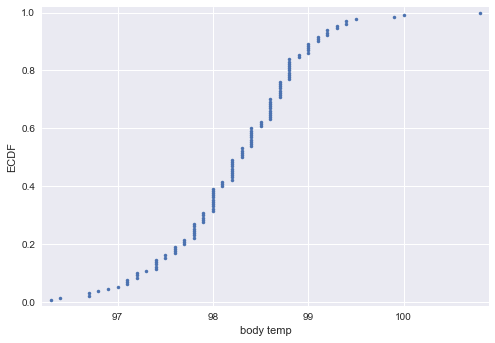

In [11]:
_ = plt.plot(x, y, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('body temp')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()


In [12]:
#looks normal!!  maybe an H test? P test?

In [13]:
#1 make h ahistogram

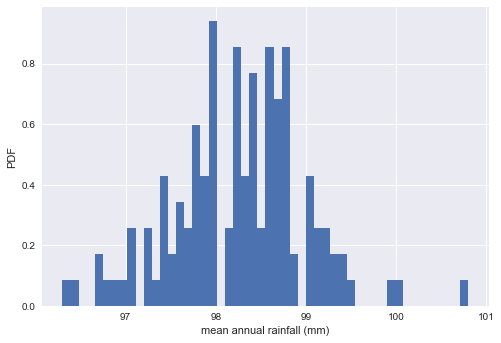

In [14]:
_ = plt.hist(df['temperature'], bins=50, normed=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [15]:
#2
#dta set is large and the measurements are independent

130
0.0640566146952
0.0618949449409


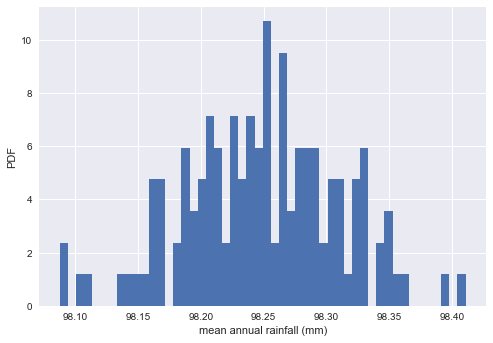

In [23]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

#3 bootstrap to see real mean.
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    print(size)
    
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

temp = df['temperature']

bs_replicates = draw_bs_reps(temp, np.mean, len(temp))


# Compute and print SEM
sem = np.std(temp) / np.sqrt(len(temp))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

plt.show()


In [17]:
#now do z test and t test on these things #p value is area in which the hull hypothesis can be rejected,
#z is how far it is. z and t and f

In [18]:
#Is the true population mean really 98.6 degrees F?
#First, try a bootstrap hypothesis test.


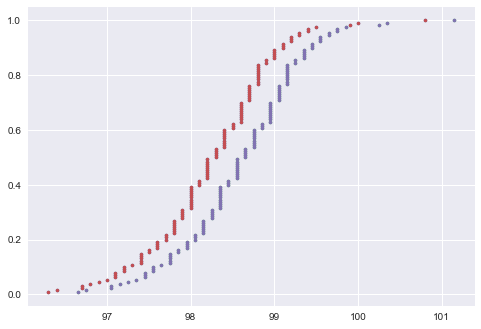

In [30]:
translated_temp = temp - np.mean(temp) + 98.6
#can do ecdf on both like in bootstrao hyp test video
x,y = ecdf(temp)
q,z = ecdf(translated_temp)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(q, z, marker='.', linestyle='none')
plt.show()

In [33]:

#shift the data, assume null hypothesis is true
def diff_of_old(data, old_value = 98.6):
    return np.mean(data) - old_value

diff_obs = diff_of_old(temp)

bs_replicates = draw_bs_reps(translated_temp, diff_of_old, 10000)
#pass in shifted 'translated_temp' because that is what we use to generate the null hypothesis


10000


In [27]:
p_value = np.sum(bs_replicates <= diff_obs) / 10000
p_value 

0.0

 Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  tt  or  zz  statistic?
Now try using the other test. How is the result be different? Why?

In [36]:
#ANSWER:
#would do a one sample test, comparing one sample of data to a single number.
#would we do a z test or t test?

#using stats models test for mean based on normal distribution, one or two samples
import statsmodels
from statsmodels import stats
z_test = statsmodels.stats.weightstats.ztest(temp)

#can assume since CLT holds, that sigma_x = sigma / sqrt()

#would use z test for large sample size



AttributeError: module 'statsmodels.stats' has no attribute 'weightstats'

In [ ]:
#4 small sample size 
# repeat both frequentist tests, would do a t test